# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [ ]:
def find_sum(a: int, d: int, N: int) -> float:
    if any(x == 0 for x in [a, d, N]):
      print("Error: Zero number was passed")
      return -1
    result = 0
    for i in range(N):
      result += 1 / (a + i * d)
    return result

a = 1
d = 1
N = 10
print(find_sum(a, d, N))

2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [ ]:
def check_palindrome(N):
    if N < 0:
      return False
    original = N
    reversed = 0
    while N > 0:
      reversed = N % 10 + reversed * 10
      N //= 10
    return original == reversed

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816, -11]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False
-11 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [ ]:
def find_palindromes(N):
    current = 42
    palindromes = []
    while len(palindromes) < N:
      if check_palindrome(current):
        palindromes.append(current)
      current += 1
    return palindromes

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [ ]:
from random import randint

def find_median(a, b, c):
    if b <= a <= c or c <= a <= b:
        return a
    elif a <= b <= c or c <= b <= a:
        return b
    else:
        return c

for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMedian:', find_median(a, b, c))

-39 2 8 	Median: 2
92 -98 -84 	Median: -84
87 -8 98 	Median: 87
13 -52 93 	Median: 13
-49 -93 -64 	Median: -64
-29 -9 -43 	Median: -29
61 -75 -28 	Median: -28
-28 -15 -14 	Median: -15
-63 -51 88 	Median: -51
-79 -46 16 	Median: -46


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [ ]:
my_array = np.random.normal(size=12)
my_array += (15 - np.sum(my_array)) / 12
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 14.999999999999998


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [ ]:
def calculate_manhattan(a, b):
    return np.sum(np.abs(a - b))

def calculate_euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def calculate_chebyshev(a, b):
    return np.max(np.abs(a - b))

def calculate_cosine(a, b):
    return 1 - np.sum(a * b) / (np.sqrt(np.sum(a ** 2)) * np.sqrt(np.sum(b ** 2)))

In [ ]:
n = 20
a = np.random.rand(n)
b = np.random.rand(n)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 7.37436471993342
Euclidean distance: 1.9579670850153312
Chebyshev distance: 0.8228631250111839
Cosine distance: 0.29865482961551526


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [28]:
def transform(array):
    transformed_array = (array - np.min(array)) / (np.max(array) - np.min(array))
    transformed_array = -6 + 16 * transformed_array

    return transformed_array

In [29]:
my_array = np.random.rand(42) * 100
print("Original array:")
print(my_array)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Original array:
[87.82793461 97.30934123 70.59065252 19.24672837 98.56592518 14.3136928
 94.47062383 14.46490179 79.32457336  8.48524046 23.94152081 87.64813247
 29.81360662 64.29519042 27.52720681 23.98894707 86.69324891 27.85786645
  7.59061801 52.85344357 60.1340442  26.10801997  4.8593228  58.77608245
 25.3293312  24.89297593 74.50933426 51.5829875   3.07265764  3.37579874
 89.41629934 95.35197194 21.45848471 25.20357337 17.6686397  55.49194483
 96.55730921  5.60270309 21.29985016  1.05804974 64.8078754  69.9321338 ]
Min: -6.0
Max: 10.0
Array:
[ 8.23801054  9.79380801  5.40955681 -3.01543227 10.         -3.82489068
  9.32800483 -3.8000789   6.84269986 -4.7812774  -2.24506702  8.20850693
 -1.28152051  4.37653878 -1.65669428 -2.23728488  8.05182074 -1.60243657
 -4.92807538  2.49907043  3.69373917 -1.88956767 -5.37625173  3.47091216
 -2.01734217 -2.08894341  6.05257059  2.29060217 -5.66942438 -5.61968217
  8.49864421  9.47262463 -2.6525067  -2.03797769 -3.27437975  2.93202028
  9.6704

**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [ ]:
my_array = np.random.randint(-12, 5, size=(10, 3))
selected_column = np.argmin(my_array.min(axis=0))
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (10, 3)
Array:
[[  1   2  -2]
 [ -4   0  -5]
 [ -6 -10 -11]
 [ -6  -5  -4]
 [ -7   1 -10]
 [ -3 -10  -8]
 [ -8   2   3]
 [ -8   4   0]
 [  2  -9   4]
 [ -2 -10  -8]]
Selected column: 2


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

### Explanation
We are replacing the missing values with the median because this will help keep the normal distribution that is presented in array after generation and the overall central tendency.

In [23]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.83655715        nan 0.79941856 0.4795077         nan        nan
        nan 0.3980336  0.92354366 0.6131295 ]


In [17]:
def replace_missing(arr):
    median = np.nanmedian(arr)
    arr[np.isnan(arr)] = median
    return arr

In [24]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.83655715 0.70627403 0.79941856 0.4795077  0.70627403 0.70627403
 0.70627403 0.3980336  0.92354366 0.6131295 ]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [44]:
def stats_channel(X):
    median = np.median(X, axis=(0, 1))
    std = np.std(X, axis=(0, 1))
    return median, std

In [47]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(X)
print(stats_channel(X))

[[[ -9 -11   1]
  [  7  -7  -1]
  [  1 -11 -11]
  ...
  [ -9   6  -1]
  [  5  -1 -11]
  [ -8   5 -11]]

 [[ -6   1   0]
  [  1  -5  -8]
  [-10   3  -3]
  ...
  [ -1   6  -5]
  [ -8   1  -1]
  [  1  -3   6]]

 [[ -1  -3   0]
  [  4  -9   2]
  [ -8 -10  -6]
  ...
  [-11  -2  -9]
  [  3 -11   3]
  [ -6   3 -11]]

 ...

 [[ -4  -8  -8]
  [ -3  -3  -9]
  [ -6   1   3]
  ...
  [ -9  -6  -7]
  [  0 -11  -7]
  [ -9  -4   2]]

 [[ -7  -4 -10]
  [  2  -2  -1]
  [ -9   7 -11]
  ...
  [ -3  -3 -11]
  [ -4  -8  -9]
  [  0  -3   7]]

 [[ -7   1  -8]
  [ -3  -2  -2]
  [ -7  -2  -4]
  ...
  [ -2   2   3]
  [ -5  -9   1]
  [ -8  -6   6]]]
(array([-2., -2., -3.]), array([5.33581429, 5.45981804, 5.32493837]))


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [40]:
def get_unique_values(X):
    return np.unique(X, axis=1)

In [43]:
X =  np.random.randint(4, 6, size=(5, 3, 3))

print('Matrix:')
print(X)
print('Unique :')
print(get_unique_values(X))

Matrix:
[[[5 5 4]
  [4 4 5]
  [5 5 4]]

 [[5 5 5]
  [4 4 5]
  [4 4 4]]

 [[5 4 4]
  [5 4 5]
  [5 4 5]]

 [[4 4 5]
  [4 4 5]
  [4 5 5]]

 [[5 4 4]
  [5 4 4]
  [5 4 4]]]
Unique :
[[[4 4 5]
  [5 5 4]
  [5 5 4]]

 [[4 4 5]
  [4 4 4]
  [5 5 5]]

 [[5 4 5]
  [5 4 5]
  [5 4 4]]

 [[4 4 5]
  [4 5 5]
  [4 4 5]]

 [[5 4 4]
  [5 4 4]
  [5 4 4]]]


# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [ ]:
dataset = pd.read_csv('titanic.csv')

dataset.head(6)

**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

### Are there any missing values? In what columns?
Yes, there are some missing values:


*   177 in column Age
*   687 in column Cabin
*   2 in column Embarked






In [53]:
missing_values = dataset.isna().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Age         177
Cabin       687
Embarked      2
dtype: int64


### What is the percentage of survived passengers? Are the classes balanced?
The percentage of survived passengers is about 38.4

While these two classes are not perfectly balanced (there are more passengers who died), they are not severely imbalanced either(38.4% vs 61.6%), so it should still be possible to build a reasonably effective predictive model without encountering severe class imbalance issues.

In [58]:
survived_percentage = (dataset['Survived'].mean()) * 100

class_balance = dataset['Survived'].value_counts()

print("Percentage of survived passengers:", survived_percentage)
print("Class balance:")
print(class_balance)

Percentage of survived passengers: 38.38383838383838
Class balance:
0    549
1    342
Name: Survived, dtype: int64


### Were there more males or females?
There were more men on the ship:


*   Number of males: 577
*   Number of females: 314



In [60]:
gender_count = dataset['Sex'].value_counts()

print("Number of males and females:")
print(gender_count)

Number of males and females:
male      577
female    314
Name: Sex, dtype: int64


### What what the least popular port of embarkation?
According to embarkation statistics:

*   Embarked in port S: 644
*   Embarked in port C: 168
*   Embarked in port Q: 77

Least popular port was Q

In [62]:
ports_count = dataset['Embarked'].value_counts()
least_popular_port = ports_count.idxmin()

print("Embarkation statistics:")
print(ports_count)
print("Least popular port of embarkation:", least_popular_port)

Embarkation statistics:
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Least popular port of embarkation: Q


### How many passenger classes (pclass) were there on Tinanic?
There were 3 passenger classes on Titanic

In [ ]:
passenger_classes_count = dataset['Pclass'].nunique()

print("Number of passenger classes on titanic:", passenger_classes_count)

Number of passenger classes on titanic: 3


### How many passenger classes (pclass) were there on Tinanic?
Average ticket fare was 32.2

And average ticket fare for every passenger class was:

1.    84.15
2.    20.66
3.    13.68



In [ ]:
overall_average_fare = dataset['Fare'].mean()

average_fare_for_every_class = dataset.groupby('Pclass')['Fare'].mean()

print("Overall average ticket fare:", overall_average_fare)
print("Average ticket fare for every passenger class:")
print(average_fare_for_every_class)

Overall average ticket fare: 32.204207968574636
Average ticket fare for every passenger class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

### What is the minimal and maximum ages of the passengers?
Minimal age among passengers: 0.42(~ 5 monts old)

Maximal age among passengers: 80

### What is the median age? And among males and females separately?
Median age among all passengers: 28

Median age among males: 29

Median age among females: 27

### Make conclusions about what you see on the plots
After looking at the plots I can say that we have right-skewed distribution with majority of passengers in younger age groups. Also we can see quite big amount of toddlers and kids that probably went sailing with their parents. Furthermore we can say that median age of females is 2 years lower than median age of males and generally the median age of males is slightly above average and median age of females is as much below average. So this could indicate that there was a bigger portion of older males among the passengers, possibly including adults or elderly individuals.

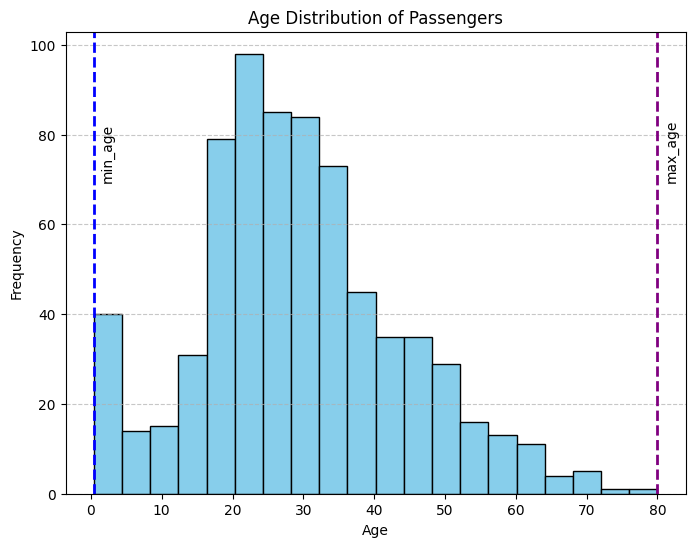

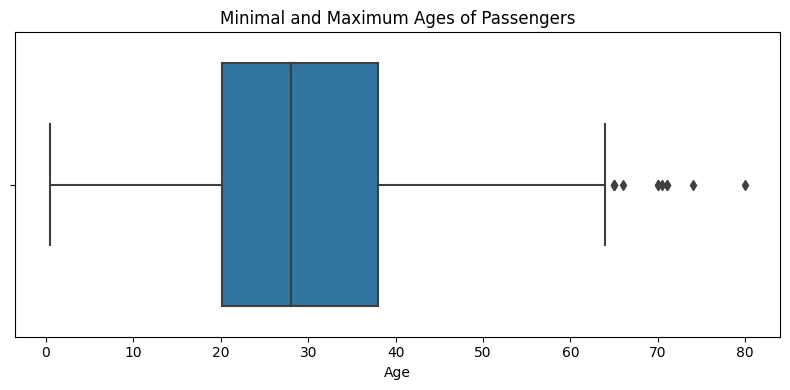

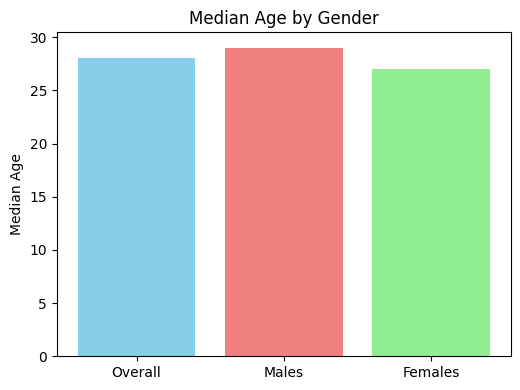

Minimum Age: 0.42
Maximum Age: 80.0
Overall Median Age: 28.0
Median Age Among Males: 29.0
Median Age Among Females: 27.0


In [72]:
age_data = dataset['Age'].dropna()

plt.figure(figsize=(8, 6))

plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

min_age = age_data.min()
max_age = age_data.max()

plt.axvline(min_age, color='blue', linestyle='dashed', linewidth=2)
plt.text(min_age + 1,70,'min_age',rotation=90)
plt.axvline(max_age, color='purple', linestyle='dashed', linewidth=2)
plt.text(max_age + 1,70,'max_age',rotation=90)

plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Age', data=dataset)

plt.xlabel('Age')
plt.title('Minimal and Maximum Ages of Passengers')
plt.tight_layout()
plt.show()

median_age = age_data.median()
median_age_male = age_data[dataset['Sex'] == 'male'].median()
median_age_female = age_data[dataset['Sex'] == 'female'].median()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(['Overall', 'Males', 'Females'], [median_age, median_age_male, median_age_female], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Median Age by Gender')
plt.ylabel('Median Age')

plt.tight_layout()
plt.show()

print("Minimum Age:", min_age)
print("Maximum Age:", max_age)
print("Overall Median Age:", median_age)
print("Median Age Among Males:", median_age_male)
print("Median Age Among Females:", median_age_female)


**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

### How many are there unique titles?
There were 17 unique titles

### How many are there passengers with every title?
Here is the number of passengers for each title:
* Mr:          517
* Miss:        182
* Mrs:         125
* Master:       40
* Dr:            7
* Rev:           6
* Mlle:          2
* Major:         2
* Col:           2
* Countess:      1
* Capt:          1
* Ms:            1
* Sir:           1
* Lady:          1
* Mme:           1
* Don:           1
* Jonkheer:      1

### What is the most popular man's title? And woman's title?
Most popular title among males: Mr

Most popular title among females: Miss

In [ ]:
import re
dataset['Title'] = dataset['Name'].apply(lambda x: re.search(r'([A-Za-z]+)\.', x).group(1))

unique_titles = dataset['Title'].nunique()

title_counts = dataset['Title'].value_counts()

male_titles = dataset[dataset['Sex'] == 'male']['Title']
female_titles = dataset[dataset['Sex'] == 'female']['Title']

most_popular_male_title = male_titles.value_counts().idxmax()
most_popular_female_title = female_titles.value_counts().idxmax()

print("Number of unique titles:", unique_titles)
print("Passengers with each title:")
print(title_counts)
print("Most popular title among males:", most_popular_male_title)
print("Most popular title among females:", most_popular_female_title)

Number of unique titles: 17
Passengers with each title:
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Most popular title among males: Mr
Most popular title among females: Miss


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



### Is there correlation between pclass and ticket price? Make conclusions about what you see on the plot

Boxplot was chosen for visualization because it shows us the distribution of ticket prices for each class, and allows us to see averages, deviation and abnormal outliers, i.e. it gives us everything we need to compare the presented data.


According to the data obtained on boxplot we can see that there is a negative correlation between passenger class and ticket price. 1 is considered to be the highest and further in descending order, so the cost of tickets of the 1st class is the highest and has the biggest amount of outliers. When calculating the correlation, we see the confirmation of our thought: the correlation is
-0.55, which indicates that there is a moderate influence of pclass and ticket price on each other.

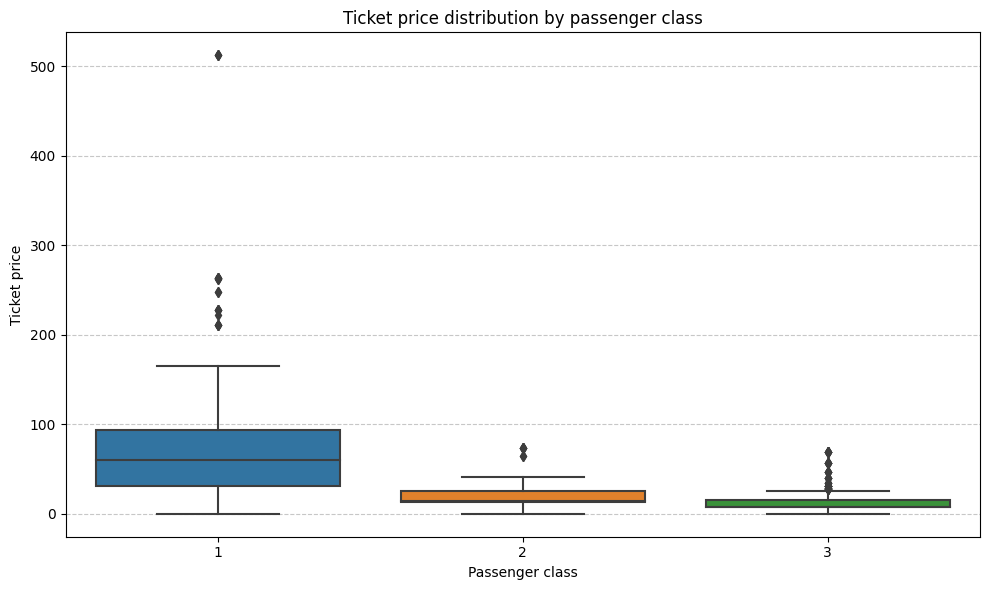

Correlation: -0.5494996199439074


In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=dataset)
plt.title('Ticket price distribution by passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Ticket price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

correlation = dataset['Pclass'].corr(dataset['Fare'])

plt.tight_layout()
plt.show()
print("Correlation between pclass and ticket price:", correlation)


**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

### Is there correlation between port of embarkation and ticket price? Make conclusions about what you see on the plot
It is not possible to calculate the correlation value between ticket price and boarding port because the port name is a categorical variable. However, it is possible to draw some conclusions from the graph. It shows that the highest ticket price was for passengers boarding the Titanic at port C (Cherbourg), followed by S (Southampton), and the lowest at port Q (Queenstown). The same gradation also applies to median values

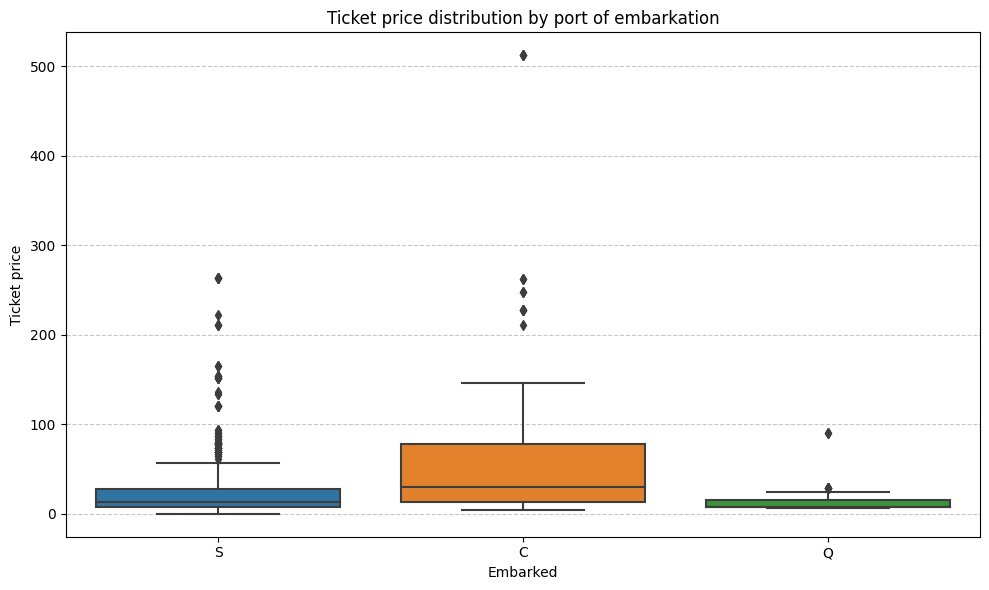

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', data=dataset)
plt.title('Ticket price distribution by port of embarkation')
plt.xlabel('Embarked')
plt.ylabel('Ticket price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

### Compute mean ages
Mean age for survived passengers: 28.34

Mean age for not survived passengers: 30.63

Mean age for survived males: 27.28

Mean age for not survived males: 31.62

Mean age for survived females: 28.85

Mean age for not survived females: 25.05

### Make conclusions about what you see on the plots
Looking at the graphs we can note an important detail that there are many survivors among children and women. Presumably this is due to the fact that women and children were the first to get into the lifeboats, while men sacrificed their lives - this confirms the very low percentage of men who survived. It is also worth noting that the average age of men who survived was lower than the average age of those who died, and the situation is the opposite for female representatives.

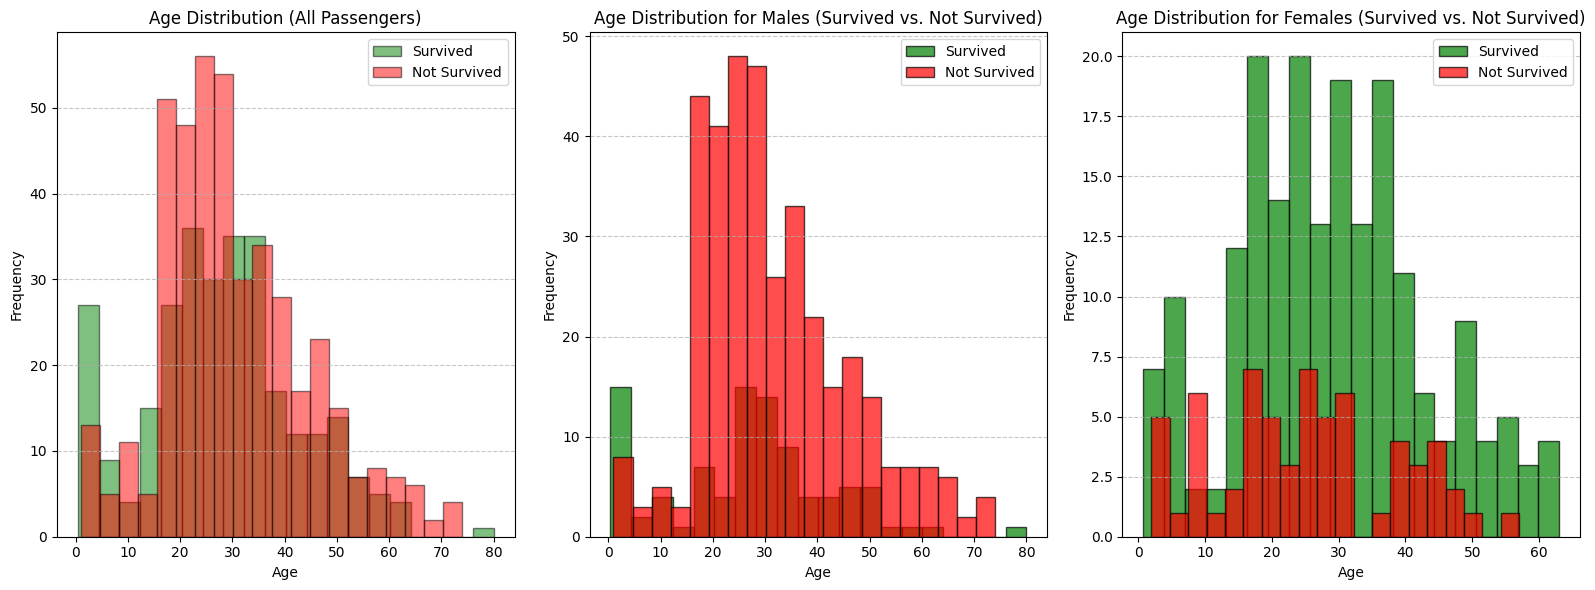

Mean age for survived passengers: 28.343689655172415
Mean age for not survived passengers: 30.62617924528302
Mean age for survived males: 27.276021505376345
Mean age for not survived males: 31.618055555555557
Mean age for survived females: 28.84771573604061
Mean age for not survived females: 25.046875


In [74]:
age_data = dataset['Age'].dropna()

survived_age = age_data[dataset['Survived'] == 1]
not_survived_age = age_data[dataset['Survived'] == 0]

survived_male_age = survived_age[dataset['Sex'] == 'male']
not_survived_male_age = not_survived_age[dataset['Sex'] == 'male']
survived_female_age = survived_age[dataset['Sex'] == 'female']
not_survived_female_age = not_survived_age[dataset['Sex'] == 'female']

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.hist(survived_age, bins=20, color='green', alpha=0.5, label='Survived', edgecolor='black')
plt.hist(not_survived_age, bins=20, color='red', alpha=0.5, label='Not Survived', edgecolor='black')
plt.title('Age Distribution (All Passengers)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(survived_male_age, bins=20, color='green', alpha=0.7, label='Survived', edgecolor='black')
plt.hist(not_survived_male_age, bins=20, color='red', alpha=0.7, label='Not Survived', edgecolor='black')
plt.title('Age Distribution for Males (Survived vs. Not Survived)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(survived_female_age, bins=20, color='green', alpha=0.7, label='Survived', edgecolor='black')
plt.hist(not_survived_female_age, bins=20, color='red', alpha=0.7, label='Not Survived', edgecolor='black')
plt.title('Age Distribution for Females (Survived vs. Not Survived)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

mean_age_survived = survived_age.mean()
mean_age_not_survived = not_survived_age.mean()
mean_age_survived_male = survived_male_age.mean()
mean_age_not_survived_male = not_survived_male_age.mean()
mean_age_survived_female = survived_female_age.mean()
mean_age_not_survived_female = not_survived_female_age.mean()

print("Mean age for survived passengers:", mean_age_survived)
print("Mean age for not survived passengers:", mean_age_not_survived)
print("Mean age for survived males:", mean_age_survived_male)
print("Mean age for not survived males:", mean_age_not_survived_male)
print("Mean age for survived females:", mean_age_survived_female)
print("Mean age for not survived females:", mean_age_not_survived_female)